# Traductor

IA que traduce textos de inglés a español

# Temas a tratar

- Procesamiento del lenguaje natural.
- Análisis de sentimiento.
- Tokenización y vectorización.
-  Embeddings.
- Implementación y entrenamiento de transformers.


# Problema

La traducción automática ha sido un desafío constante en el campo de la inteligencia artificial y el procesamiento del lenguaje natural. A pesar de los avances significativos en los últimos años, aún existen muchos retos por resolver para lograr traducciones de alta calidad y fluidez.



# Solución

Se propone desarrollar un modelo de traducción basado en la arquitectura transformer que pueda realizar traducciones entre múltiples idiomas de manera eficiente y precisa. El objetivo es mejorar la calidad de las traducciones en comparación con los enfoques tradicionales, como los modelos basados en recurrencia o convolución.

# Objetivo

Desarrollar un modelo de traducción automática

# Desarrollo

## Análisis y preprocesamiento de datos

In [ ]:
!pip install -q --upgrade rouge-score
!pip install -q --upgrade keras-nlp
!pip install -q --upgrade keras  # Upgrade to Keras 3.

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 36.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you ha

### Obtención de datos

Para este caso usaremos como dataset, el conjunto de datos de traducciones español-inglés de [Anki](https://www.manythings.org/anki/), la reconocida aplicación de aprendizaje de idiomas a través de flashcards

In [ ]:
import keras
import pathlib

text_file = keras.utils.get_file(
    fname="spa-eng.zip",
    origin="http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip",
    extract=True,
)
text_file = pathlib.Path(text_file).parent / "spa-eng" / "spa.txt"
text_file

2638744/2638744 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


PosixPath('/root/.keras/datasets/spa-eng/spa.txt')

### Análisis y preprocesamiento

Cargamos el archivo que acabamos de descargar y veamos qué tiene

In [ ]:
import pandas as pd
df = pd.read_csv(text_file, sep="\t")
df

Go.  \
0                                                     Go.   
1                                                     Go.   
2                                                     Go.   
3                                                     Hi.   
4                                                    Run!   
...                                                   ...   
118958  There are four main causes of alcohol-related ...   
118959  There are mothers and fathers who will lie awa...   
118960  A carbon footprint is the amount of carbon dio...   
118961  Since there are usually multiple websites on a...   
118962  If you want to sound like a native speaker, yo...   

                                                      Ve.  
0                                                   Vete.  
1                                                   Vaya.  
2                                                 Váyase.  
3                                                   Hola.  
4                                                 ¡Corre!  
...                                                   ...  
118958  Hay cuatro causas principales de muertes relac...  
118959  Hay madres y padres que se quedan despiertos d...  
118960  Una huella de carbono es la cantidad de contam...  
118961  Como suele haber varias páginas web sobre cual...  
118962  Si quieres sonar como un hablante nativo, debe...  

[118963 rows x 2 columns]

Vale, parece que tiene las oraciones en inglés en la primera columna, y la traducción en español en la segunda. Vamos a pasar todos los textos a minúsculas

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())
df

Go.  \
0                                                     go.   
1                                                     go.   
2                                                     go.   
3                                                     hi.   
4                                                    run!   
...                                                   ...   
118958  there are four main causes of alcohol-related ...   
118959  there are mothers and fathers who will lie awa...   
118960  a carbon footprint is the amount of carbon dio...   
118961  since there are usually multiple websites on a...   
118962  if you want to sound like a native speaker, yo...   

                                                      Ve.  
0                                                   vete.  
1                                                   vaya.  
2                                                 váyase.  
3                                                   hola.  
4                                                 ¡corre!  
...                                                   ...  
118958  hay cuatro causas principales de muertes relac...  
118959  hay madres y padres que se quedan despiertos d...  
118960  una huella de carbono es la cantidad de contam...  
118961  como suele haber varias páginas web sobre cual...  
118962  si quieres sonar como un hablante nativo, debe...  

[118963 rows x 2 columns]

Listo, ya no necesitamos más el dataframe, vamos a generar un numpy array con sus contenido

In [ ]:
text_pairs = df.values
text_pairs

array([['go.', 'vete.'],
       ['go.', 'vaya.'],
       ['go.', 'váyase.'],
       ...,
       ['a carbon footprint is the amount of carbon dioxide pollution that we produce as a result of our activities. some people try to reduce their carbon footprint because they are concerned about climate change.',
        'una huella de carbono es la cantidad de contaminación de dióxido de carbono que producimos como producto de nuestras actividades. algunas personas intentan reducir su huella de carbono porque están preocupados acerca del cambio climático.'],
       ['since there are usually multiple websites on any given topic, i usually just click the back button when i arrive on any webpage that has pop-up advertising. i just go to the next page found by google and hope for something less irritating.',
        'como suele haber varias páginas web sobre cualquier tema, normalmente sólo le doy al botón de retroceso cuando entro en una página web que tiene anuncios en ventanas emergentes. simpl

Genial, sin embargo ya vimos que al estar ordenados, se repiten muchas traducciones seguidas, esto puede afectar los datos de entrenamiento, por ello mejor vamos a sortear aleatoriamente el conjunto de datos

In [ ]:
import numpy as np

np.random.shuffle(text_pairs)
text_pairs

array([["aren't you tired?", '¿no está cansado?'],
       ['do you know what it is?', '¿sabes qué es?'],
       ['tom lay awake for a long time thinking about mary.',
        'tom yació despierto durante un largo rato pensando en mary.'],
       ...,
       ['i met him at the station.', 'me lo encontré en la estación.'],
       ['nobody reads long messages.', 'nadie lee los mensajes largos.'],
       ['traveling abroad is very interesting.',
        'viajar al extranjero es muy interesante.']], dtype=object)

Ya desorganizados, podemos crear un conjunto de evaluación, entrenamiento y pruebas. Tomemos al conjunto de entrenamiento como el 70% y el resto equitativo

In [ ]:
num_val_samples = int(0.15 * len(text_pairs))
num_train_samples = len(text_pairs) - 2 * num_val_samples
train_pairs = text_pairs[:num_train_samples]
val_pairs = text_pairs[num_train_samples : num_train_samples + num_val_samples]
test_pairs = text_pairs[num_train_samples + num_val_samples :]

print(f"{len(text_pairs)} pares totales")
print(f"{len(train_pairs)} pares de entrenamiento")
print(f"{len(val_pairs)} pares de validación")
print(f"{len(test_pairs)} pares de prueba")

118963 pares totales
83275 pares de entrenamiento
17844 pares de validación
17844 pares de prueba


### Tokenización

Ya con el preprocesamiento básico, necesitamos crear 2 tokenizers, uno para el el idioma de entrada y otro para el de salida.

Para tokenizar usaremos el algoritmo WordPiece, un algoritmo de tokenización por subpalabras bastante popilar y que con keras disponemos en su módulo tokenizers.

Vamos a crear una función para obtener el vocabulario de un conjunto de datos

In [ ]:
import keras_nlp
import tensorflow.data as tf_data

def train_word_piece(text_samples, vocab_size, reserved_tokens):
    word_piece_ds = tf_data.Dataset.from_tensor_slices(text_samples)
    vocab = keras_nlp.tokenizers.compute_word_piece_vocabulary(
        word_piece_ds.batch(1000).prefetch(2),
        vocabulary_size=vocab_size,
        reserved_tokens=reserved_tokens,
    )
    return vocab

Vale, vamos a definir el hiperparámetro de vocabulario, pues pese a que los idiomas son muy ricos, con unas pocas palabras es posible entender casi todo el idioma. En este caso escogeremos un vocabulario de 15 mil tokens, pero puede escoger el valor que quiera para el tokenizador.

A su vez añadimos los tokens especiales para indicar inicio, fin, frase recortada o token desconocido.

In [ ]:
ENG_VOCAB_SIZE = 15000
SPA_VOCAB_SIZE = 15000

reserved_tokens = ["[PAD]", "[UNK]", "[START]", "[END]"]

eng_samples = [text_pair[0] for text_pair in train_pairs]
eng_vocab = train_word_piece(eng_samples, ENG_VOCAB_SIZE, reserved_tokens)

spa_samples = [text_pair[1] for text_pair in train_pairs]
spa_vocab = train_word_piece(spa_samples, SPA_VOCAB_SIZE, reserved_tokens)

Ya tokenizamos, vamos a revisar los tokens que se obtuvieron

In [ ]:
print("Tokens en inglés: ", eng_vocab[100:110])
print("Tokens en español: ", spa_vocab[100:110])

Tokens en inglés:  ['there', 'they', 'go', 'her', 'will', 'has', 're', 'time', 'how', 'll']
Tokens en español:  ['le', 'ella', 'te', 'mary', 'para', 'las', 'más', 'al', 'yo', 'tu']


Ya tenemos los vocabularios, procedemos a crear los WordPieceTokenizer con keras nlp

In [ ]:
eng_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=eng_vocab, lowercase=False
)
spa_tokenizer = keras_nlp.tokenizers.WordPieceTokenizer(
    vocabulary=spa_vocab, lowercase=False
)

Y listo, ya tenemos nuestros tokenizers creados. Podemos confirmar que funcione correctamente, escogiendo por ejemplo la primera palabra y viendo cómo la tokeniza y hace el proceso inverso.

In [ ]:
# Tomamos la primera frase en inglés
eng_input_ex = text_pairs[0][0]

# La tokenizamos
eng_tokens_ex = eng_tokenizer.tokenize(eng_input_ex)
print("Oración en inglés: ", eng_input_ex)
print("Tokens: ", eng_tokens_ex)

# Recuperamos
print(
    "Recuperado al detokenizar: ",
    eng_tokenizer.detokenize(eng_tokens_ex),
)

print("--------------")

# Tomamos la primera frase en español
spa_input_ex = text_pairs[0][1]

# La tokenizamos
spa_tokens_ex = spa_tokenizer.tokenize(spa_input_ex)
print("Oración en español: ", spa_input_ex)
print("Tokens: ", spa_tokens_ex)

# Recuperamos
print(
    "Recuperado al detokenizar: ",
    spa_tokenizer.detokenize(spa_tokens_ex),
)

Oración en inglés:  aren't you tired?
Tokens:  tf.Tensor([424   8  46  65 335  26], shape=(6,), dtype=int32)
Recuperado al detokenizar:  tf.Tensor(b"aren ' t you tired ?", shape=(), dtype=string)
--------------
Oración en español:  ¿no está cansado?
Tokens:  tf.Tensor([ 63  80  95 476  28], shape=(5,), dtype=int32)
Recuperado al detokenizar:  tf.Tensor(b'\xc2\xbf no est\xc3\xa1 cansado ?', shape=(), dtype=string)


### Creación de datasets

Vamos a entrenar el modelo dándole una frase de longitud N, con las traducciones para cada una (targets 0 a N), y el modelo deberá predecir el token N+1 comparando con el target N+1.

Tomando en cuenta esto, el dataset tendría la forma `(inputs, targets)` donde:

- `inputs` debe ser un diccionario con keys `encoder_inputs` y `decoder_inputs`. `encoder_inputs` es la frase fuente tokenizada y `decoder_inputs` es la frase objetivo para el momento, es decir, los tokens de 0 a N utilizadas para predecir la palabra N+1 (y más allá) en la frase objetivo.
-`targets` debe ser la salida, el token, que se desea predecir en cada momento.

Adicionalmente pondremos los indicadores de cuándo inicia o termina una oración, y si la longitud de la secuencia es menor a la establecida, indicar que fue redactada.



In [ ]:
# Definimos la longitud de las secuencias en 40
MAX_SEQUENCE_LENGTH=40

In [ ]:
from keras import ops


def preprocess_batch(eng, spa):
    spa = spa_tokenizer(spa)
    eng = eng_tokenizer(eng)


    # Agregamos padding al input del encoder
    spa_start_end_packer = keras_nlp.layers.StartEndPacker(
        sequence_length=MAX_SEQUENCE_LENGTH,
        pad_value=spa_tokenizer.token_to_id("[PAD]"),
    )
    spa = spa_start_end_packer(spa)

    # Agregamos tokens especiales y padding al input del decoder
    eng_start_end_packer = keras_nlp.layers.StartEndPacker(
        sequence_length=MAX_SEQUENCE_LENGTH + 1,
        start_value=eng_tokenizer.token_to_id("[START]"),
        end_value=eng_tokenizer.token_to_id("[END]"),
        pad_value=eng_tokenizer.token_to_id("[PAD]"),
    )
    eng = eng_start_end_packer(eng)

    return (
        {
            "encoder_inputs": spa,
            "decoder_inputs": eng[:, :-1],
        },
        eng[:, 1:],
    )


def make_dataset(pairs):
    eng_texts, spa_texts = zip(*pairs)
    eng_texts = list(eng_texts)
    spa_texts = list(spa_texts)
    dataset = tf_data.Dataset.from_tensor_slices((eng_texts, spa_texts))
    dataset = dataset.batch(64)
    dataset = dataset.map(preprocess_batch, num_parallel_calls=tf_data.AUTOTUNE)
    return dataset.shuffle(2048).prefetch(16).cache()


train_ds = make_dataset(train_pairs)
val_ds = make_dataset(val_pairs)

Genial. El código puede ser confuso, pero lo que se está haciendo es empaquetar las secuencias de tokens en grupos de `MAX_SEQUENCE_LENGTH` tokens y poniendo `[PAD]` en el caso de que sobre caracteres para llenar la secuencia. En el caso del decoder necesitamos también indicar el inicio `[START]` y el fin `[END]`, pues el decoder necesita tener un punto dónde empezar a predecir y dónde terminar sus predicciones.

Al final lo empaquetamos todo en batches de 64, para que en vez de entrenar con un elemento a la vez (83275 muestras), le meteremos 64 al mismo tiempo (1302 muestras), previsiblemente optimizando el entrenamiento al hacer trabajo en paralelo.

Finalmente vamos a comprobar lo que dijimos.

In [ ]:
for inputs, targets in train_ds.take(1):
    print(f'inputs["encoder_inputs"].shape: {inputs["encoder_inputs"].shape}')
    print(f'inputs["decoder_inputs"].shape: {inputs["decoder_inputs"].shape}')
    print(f"targets.shape: {targets.shape}")

inputs["encoder_inputs"].shape: (64, 40)
inputs["decoder_inputs"].shape: (64, 40)
targets.shape: (64, 40)


En efecto, los inputs son (64, 40)  que nos indica que estaremos introduciendo 64 secuencias de 40 tokens al modelo.

## Selección e implementación del modelo

El modelo a implementar es un transformer. Lo primero que haremos será definir los hiperparámetros. Para ello primero veamos el modelo

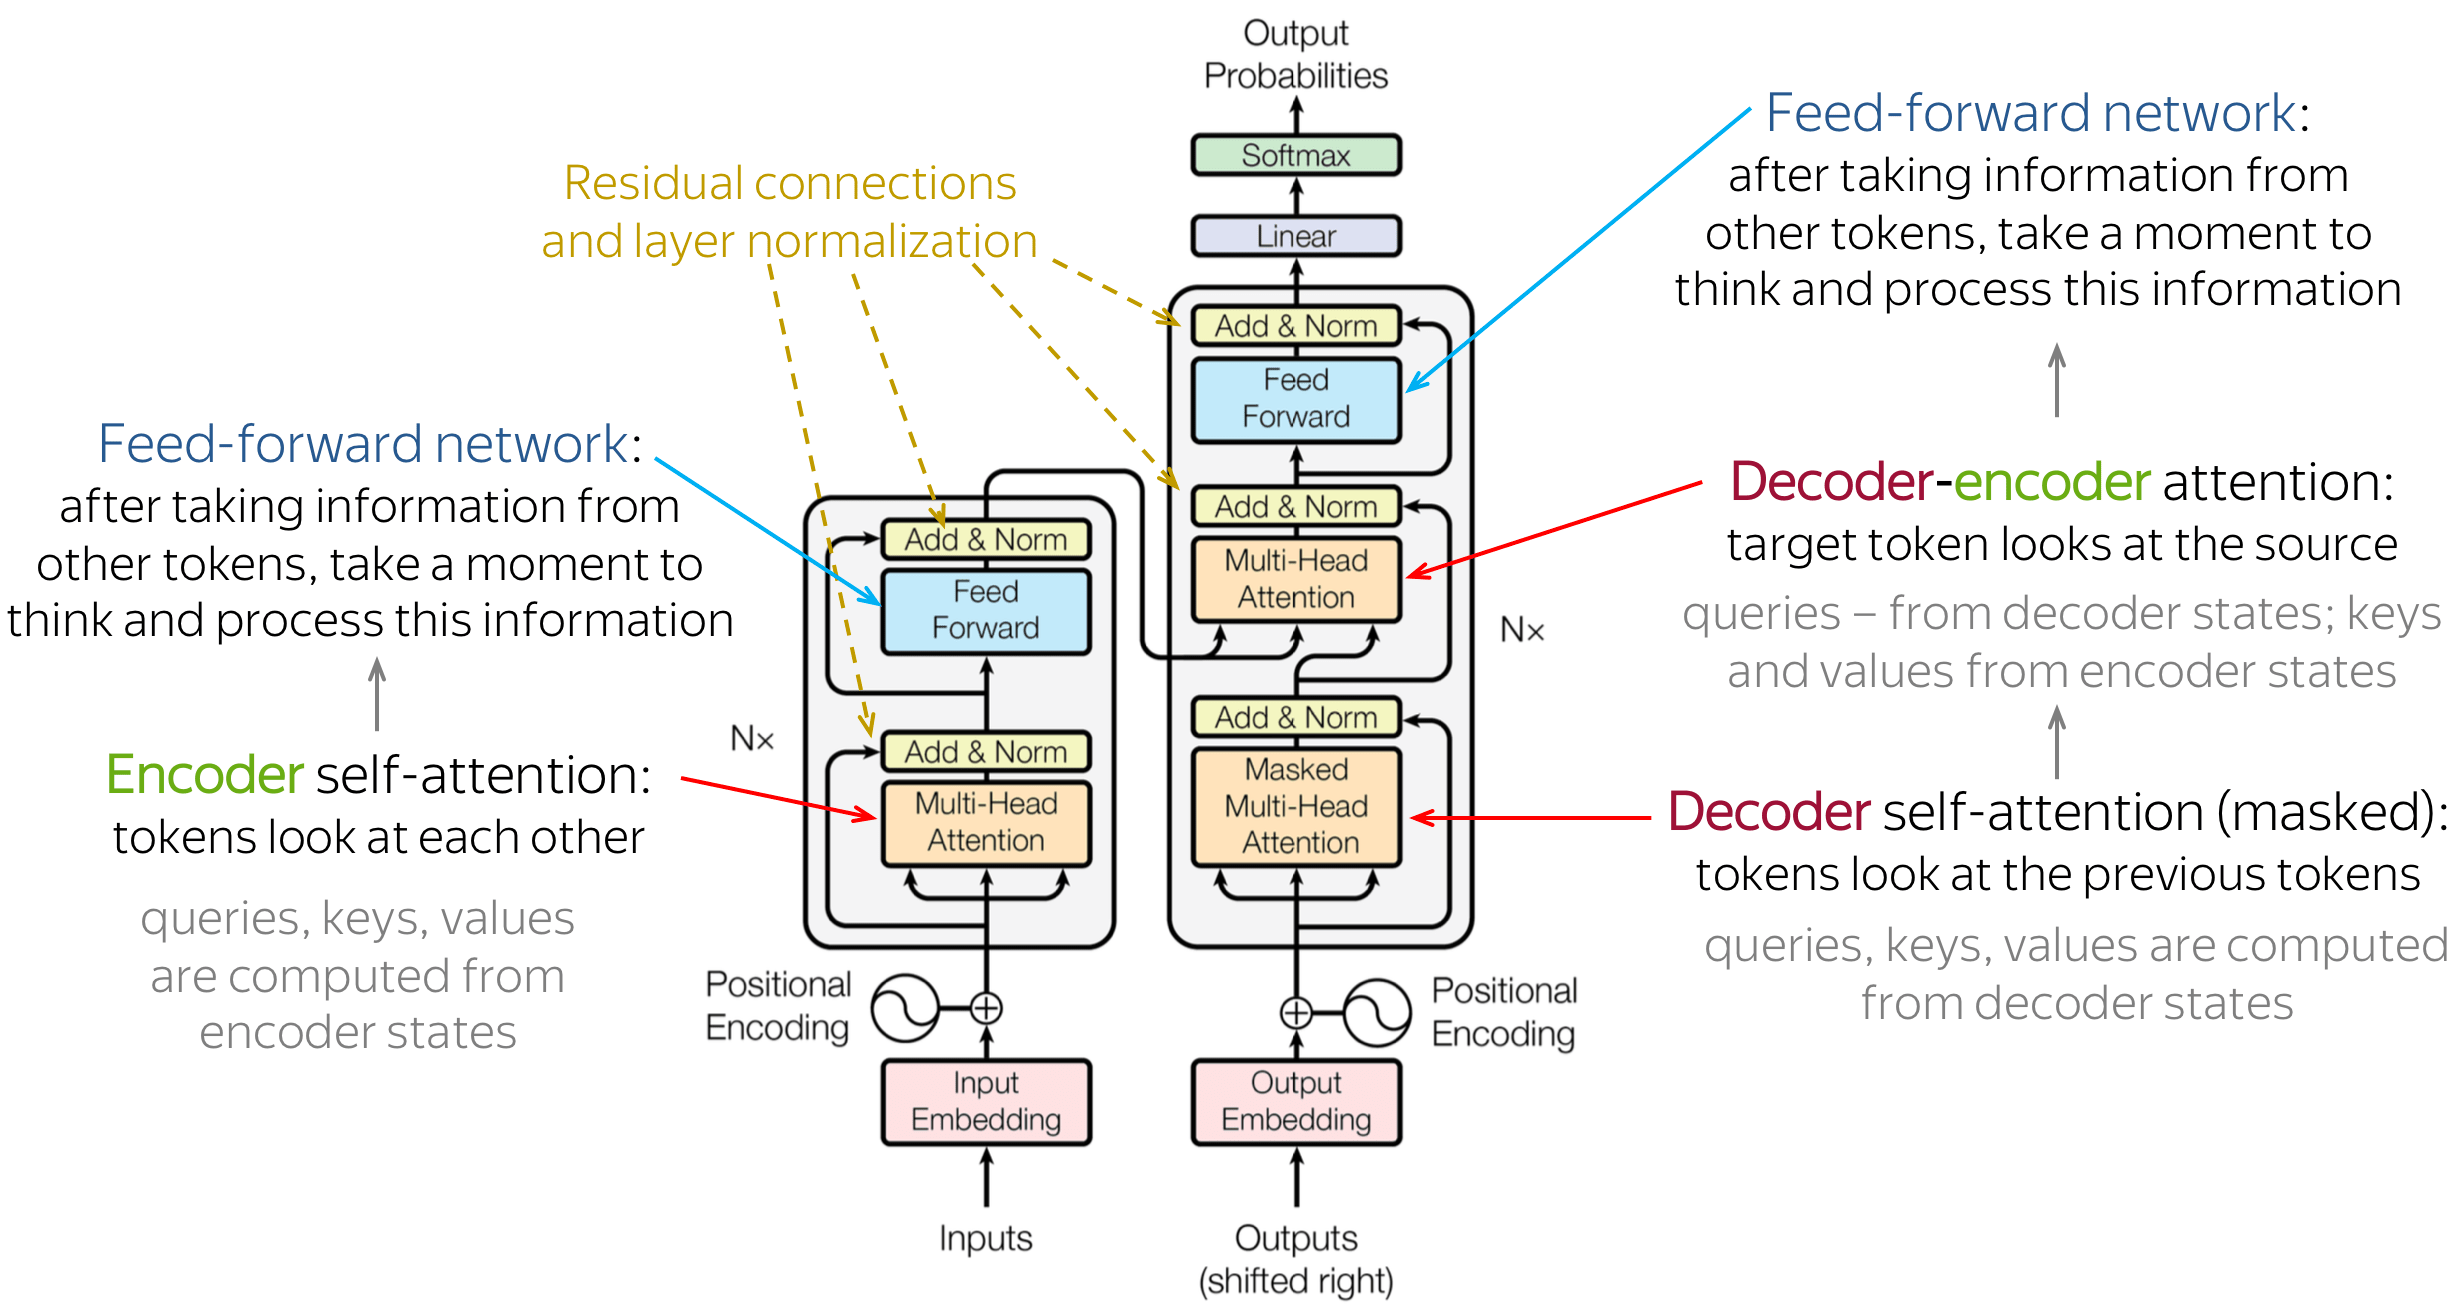



In [ ]:
EMBED_DIM = 256 # Dimensionalidad de los embeddings
INTERMEDIATE_DIM = 2048 # Número de unidades de la capa intermedia
NUM_HEADS = 8 # Número de cabezas de atención

Ahora vamos con el encoder. Este se podría implementar con la API sequential de keras, pero como el decoder no se puede implementar con la misma API, para mantener consistencia se implementará con la Functional API.

Implementamos el input embedding con `TokenAndPositionEmbedding` y el encoder del transformer con `TransformerEncoder`

In [ ]:
# Creamos el input del encoder
encoder_inputs = keras.Input(shape=(None,), name="encoder_inputs")

x = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=ENG_VOCAB_SIZE,
    sequence_length=MAX_SEQUENCE_LENGTH,
    embedding_dim=EMBED_DIM,
)(encoder_inputs)

# Ahora creamos la capa encoder del transformer
encoder_outputs = keras_nlp.layers.TransformerEncoder(
    intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
)(inputs=x)

# Creamos el modelo encoder
encoder = keras.Model(encoder_inputs, encoder_outputs)

El decoder no puede ser implementado con la API Sequential porque el decoder tiene 2 inputs, uno desde afuera que pasa por una capa de embedding y el dado por el encoder, uniéndose en la etapa de cross-attention.

In [ ]:
# Definimos las 2 entradas, la que se le pasa desde afuera y la que recibe desde el encoder
decoder_inputs = keras.Input(shape=(None,), name="decoder_inputs") # secuencia
encoded_seq_inputs = keras.Input(shape=(None, EMBED_DIM), name="decoder_state_inputs") # decoder

# Calculamos los embeddings de la entrada al decoder desde la secuencia
x = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=SPA_VOCAB_SIZE,
    sequence_length=MAX_SEQUENCE_LENGTH,
    embedding_dim=EMBED_DIM,
)(decoder_inputs)


# Ahora creamos el decoder con ambos inputs
x = keras_nlp.layers.TransformerDecoder(
    intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
)(decoder_sequence=x, encoder_sequence=encoded_seq_inputs)
x = keras.layers.Dropout(0.5)(x)
decoder_outputs = keras.layers.Dense(SPA_VOCAB_SIZE, activation="softmax")(x)

# Creamos el modelo decoder
decoder = keras.Model(
    [
        decoder_inputs,
        encoded_seq_inputs,
    ],
    decoder_outputs,
)
decoder_outputs = decoder([decoder_inputs, encoder_outputs])

Y listo, ya con el encoder y el decoder, solo hace falta unirlo en un modelo que vamos a llamar transformer

In [ ]:
transformer = keras.Model(
    [encoder_inputs, decoder_inputs],
    decoder_outputs,
    name="transformer",
)
transformer.summary()

Model: "transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_and_position_embed… │ (None, None, 256)      │      3,850,240 │ encoder_inputs[0][0]   │
│ (TokenAndPositionEmbeddi… │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder_inputs            │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ transformer_encoder       │ (None, None, 256)      │      1,315,072 │ token_and_position_em… │
│ (TransformerEncoder)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_3 (Functional) │ (None, None, 15000)    │      9,283,992 │ decoder_inputs[0][0],  │
│                           │                        │                │ transformer_encoder[0… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 14,449,304 (55.12 MB)

 Trainable params: 14,449,304 (55.12 MB)

 Non-trainable params: 0 (0.00 B)

Como vemos, tenemos nuestro transformer con encoder y decoder. Vamos a compilarlo para la tarea de regresión

In [ ]:
transformer.compile(
    "rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

Y ahora lo entrenamos por 5 épocas. En teoría para converger debería ser entrenado por 30, pero 5 debería generar una exactitud decente.

In [21]:
transformer.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 183s 92ms/step - accuracy: 0.8263 - loss: 1.3771 - val_accuracy: 0.8797 - val_loss: 0.7181
Epoch 2/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.8891 - loss: 0.6659 - val_accuracy: 0.9111 - val_loss: 0.5118
Epoch 3/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 60s 46ms/step - accuracy: 0.9115 - loss: 0.5067 - val_accuracy: 0.9199 - val_loss: 0.4453
Epoch 4/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9213 - loss: 0.4348 - val_accuracy: 0.9254 - val_loss: 0.4103
Epoch 5/5
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9274 - loss: 0.3921 - val_accuracy: 0.9279 - val_loss: 0.3975


## Análisis de resultados

Vamos a hacer un análisis cualitativo introduciendo unas cuantas muestras de test, y ya luego hacemos uno cuantitatico usando la métrica Rogue

In [22]:
import random

def decode_sequences(input_sentences):
    batch_size = 1

    # Tokenizamos el input (español)
    encoder_input_tokens = ops.convert_to_tensor(spa_tokenizer(input_sentences))
    if len(encoder_input_tokens[0]) < MAX_SEQUENCE_LENGTH:
      # ocupa menos de MAX_SEQUENCE_LENGTH, agrega padding
        pads = ops.full((1, MAX_SEQUENCE_LENGTH - len(encoder_input_tokens[0])), 0)
        encoder_input_tokens = ops.concatenate(
            [encoder_input_tokens.to_tensor(), pads], 1
        )

    # Función para obtener la probabilidad del siguiente token dada una secuencia de entrada
    # pasada a un GreedySampler
    def next(prompt, cache, index):
        # obtenemos los logits del transformer
        logits = transformer([encoder_input_tokens, prompt])[:, index - 1, :]
        # Ignoramos los hidden states porque solo son necesarios para búsqueda por contraste
        hidden_states = None
        return logits, hidden_states, cache

    # Ahora construye el propmpt del decoder
    length = 40
    # Nuestro prompt inicia en [START], por lo que le decimos al modelo que genere una predicción
    start = ops.full((batch_size, 1), eng_tokenizer.token_to_id("[START]"))
    # Rellanamos el resto del prompot con [PAD]
    pad = ops.full((batch_size, length - 1), eng_tokenizer.token_to_id("[PAD]"))
    # Creamos el prompt
    prompt = ops.concatenate((start, pad), axis=-1)

    # Ahora generamos una secuencia de tokens
    generated_tokens = keras_nlp.samplers.GreedySampler()(
        next,
        prompt,
        stop_token_ids=[eng_tokenizer.token_to_id("[END]")],
        index=1,  # Empieza luego del [START] (que es el índice 0)
    )

    # Decodifica los tokens predichos para tener la traducción
    generated_sentences = eng_tokenizer.detokenize(generated_tokens)
    return generated_sentences

In [30]:
# Probamos con 3 textos en español
test_spa_texts = [pair[1] for pair in test_pairs]
for i in range(3):
    # Predecimos
    input_sentence = random.choice(test_spa_texts)
    translated = decode_sequences([input_sentence])

    # Sanitizamos la salida
    translated = translated.numpy()[0].decode("utf-8")
    translated = (
        translated.replace("[PAD]", "")
        .replace("[START]", "")
        .replace("[END]", "")
        .strip()
    )

    # Mostramos salidas
    print(f"** Ejemlo {i} **")
    print(f"Español: {input_sentence}")
    print(f"inglés: {translated}")
    print()

** Ejemlo 0 **
Español: no hagas eso, por favor.
inglés: please don ' t do that .

** Ejemlo 1 **
Español: ¿dónde te quitaste las botas?
inglés: where did you get on your boots ?

** Ejemlo 2 **
Español: ¿para qué sirve eso?
inglés: what is that for ?



Listo! Ya tenemos una función para decodificar, vamos a crear una función final para traducir que haga algo parecido a lo que hicimos

In [32]:
def translate_spanish_to_english(text):
  translated = decode_sequences([text])

  # Sanitizamos la salida
  translated = translated.numpy()[0].decode("utf-8")
  translated = (
      translated.replace("[PAD]", "")
      .replace("[START]", "")
      .replace("[END]", "")
      .strip()
  )
  return translated

In [35]:
translate_spanish_to_english("Él es una buena persona.")

"they ' re a good person ."

Genial, parece funcionar bien. De todas formas vamos a hacer un análisis cuantitativo con Rouge.

In [38]:
rouge_1 = keras_nlp.metrics.RougeN(order=1)
rouge_2 = keras_nlp.metrics.RougeN(order=2)

# Tomamos 30 pares para sacar métricas
for test_pair in test_pairs[:30]:
    input_sentence = test_pair[1]
    reference_sentence = test_pair[0]

    translated_sentence = decode_sequences([input_sentence])
    translated_sentence = translated_sentence.numpy()[0].decode("utf-8")
    translated_sentence = (
        translated_sentence.replace("[PAD]", "")
        .replace("[START]", "")
        .replace("[END]", "")
        .strip()
    )

    rouge_1(reference_sentence, translated_sentence)
    rouge_2(reference_sentence, translated_sentence)

print("ROUGE-1 Score: ", rouge_1.result())
print("ROUGE-2 Score: ", rouge_2.result())

ROUGE-1 Score:  {'precision': <tf.Tensor: shape=(), dtype=float32, numpy=0.7141774>, 'recall': <tf.Tensor: shape=(), dtype=float32, numpy=0.6740067>, 'f1_score': <tf.Tensor: shape=(), dtype=float32, numpy=0.6894681>}
ROUGE-2 Score:  {'precision': <tf.Tensor: shape=(), dtype=float32, numpy=0.45388895>, 'recall': <tf.Tensor: shape=(), dtype=float32, numpy=0.42812893>, 'f1_score': <tf.Tensor: shape=(), dtype=float32, numpy=0.4376272>}


# Despliegue

In [39]:
!pip install --ignore-installed Flask==3.0.0 pyngrok==7.1.2
ngrok_key = "Coloca tu token aquí"
port = 5000

from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.3/227.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 46.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.0+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.0+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which

In [49]:
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port)

<NgrokTunnel: "https://b039-34-124-163-234.ngrok-free.app" -> "http://localhost:5000">

In [54]:
from IPython.display import IFrame
IFrame(src="https://projects.rolandoandrade.me/traductor/", width=800, height=600)

In [53]:
from flask import Flask, request, jsonify, Response
import json

app = Flask(__name__)

@app.route("/", methods=['POST'])
def hello():
  body = request.get_json(force=True)
  print(body['prompt'])
  translated = translate_spanish_to_english(body['prompt'])
  return Response(json.dumps({
      'translation': translated
  }), headers=[('Access-Control-Allow-Origin', '*')])

if __name__ == '__main__':
    app.run(port = port)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


Esto es una prueba


INFO:werkzeug:127.0.0.1 - - [26/May/2024 23:04:51] "POST / HTTP/1.1" 200 -


¿pasa algo


INFO:werkzeug:127.0.0.1 - - [26/May/2024 23:05:03] "POST / HTTP/1.1" 200 -


¿pasa algo?


INFO:werkzeug:127.0.0.1 - - [26/May/2024 23:05:04] "POST / HTTP/1.1" 200 -


# Conclusiones

Los transformers son el estado del arte actual en el campo del procesamiento del lenguaje natural al ser bastante eficientes y dar resultados bastante impresionantes. Sin embargo no son la solución a todos los problemas, generando varios resultados sin sentido y alucinaciones.

# Tu turno

Si quieres puedes entrenar el modelo por 30 épocas y guardar los pesos para que tengas tu modelo bueno de traducción.

Por otro lado, obviamente hay mejores formas de hacer ésto, busca los modelos de hugging face y aplica el rouge validation para ver qué tal serían en contra del dataset de Anki